In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1] range (important for faster convergence)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images from 28x28 to 784 vector (for Dense layers)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Convert labels to one-hot encoding (10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='categorical_crossentropy',  # loss function for multi-class classification
              metrics=['accuracy'])  # track accuracy

# Train the model
history = model.fit(
    x_train, y_train,            # training data and labels
    epochs=15,                   # number of passes over the dataset
    batch_size=128,              # batch size for gradient updates
    validation_split=0.2         # 20% of training data used for validation
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9459 - loss: 0.2782 - val_accuracy: 0.9677 - val_loss: 0.1991
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9518 - loss: 0.2523 - val_accuracy: 0.9690 - val_loss: 0.1915
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9498 - loss: 0.2523 - val_accuracy: 0.9712 - val_loss: 0.1814
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9521 - loss: 0.2424 - val_accuracy: 0.9718 - val_loss: 0.1815
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9529 - loss: 0.2383 - val_accuracy: 0.9683 - val_loss: 0.1863
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9505 - loss: 0.2410 - val_accuracy: 0.9703 - val_loss: 0.1792
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9501 - loss: 0.2386 - val_accuracy: 0.9712 - val_loss: 0.1785
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9520 - loss: 0.2345 - val_ac

In [8]:
from tensorflow.keras import layers, models, regularizers

model1 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

In [9]:
model2 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l1(0.001)),  # L1 regularization
    layers.BatchNormalization(),                       # Batch Normalization
    layers.Dropout(0.3),                               # Dropout
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9548 - loss: 0.2205 - val_accuracy: 0.9725 - val_loss: 0.1630
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9552 - loss: 0.2216 - val_accuracy: 0.9707 - val_loss: 0.1668
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9550 - loss: 0.2182 - val_accuracy: 0.9713 - val_loss: 0.1702
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9544 - loss: 0.2185 - val_accuracy: 0.9711 - val_loss: 0.1656
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9556 - loss: 0.2111 - val_accuracy: 0.9699 - val_loss: 0.1723
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9570 - loss: 0.2153 - val_accuracy: 0.9721 - val_loss: 0.1627
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9562 - loss: 0.2175 - val_accuracy: 0.9725 - val_loss: 0.1665
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9568 - loss: 0.2186 - val_

In [11]:
# Assuming x_train, y_train are already preprocessed

# --- Model 1: L2 Regularization Only ---
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history1 = model1.fit(x_train, y_train,
                      epochs=15,
                      batch_size=128,
                      validation_split=0.2)

# --- Model 2: L1 Regularization + Dropout + BatchNorm ---
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
                      epochs=15,
                      batch_size=128,
                      validation_split=0.2)


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8642 - loss: 1.0551 - val_accuracy: 0.9555 - val_loss: 0.4241
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9622 - loss: 0.3683 - val_accuracy: 0.9669 - val_loss: 0.2785
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9680 - loss: 0.2606 - val_accuracy: 0.9668 - val_loss: 0.2415
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9720 - loss: 0.2212 - val_accuracy: 0.9729 - val_loss: 0.2035
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9763 - loss: 0.1926 - val_accuracy: 0.9728 - val_loss: 0.1923
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9757 - loss: 0.1838 - val_accuracy: 0.9744 - val_loss: 0.1895
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9785 - loss: 0.1741 - val_accuracy: 0.9722 - val_loss: 0.1920
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9784 - loss: 0.1639 - val_a

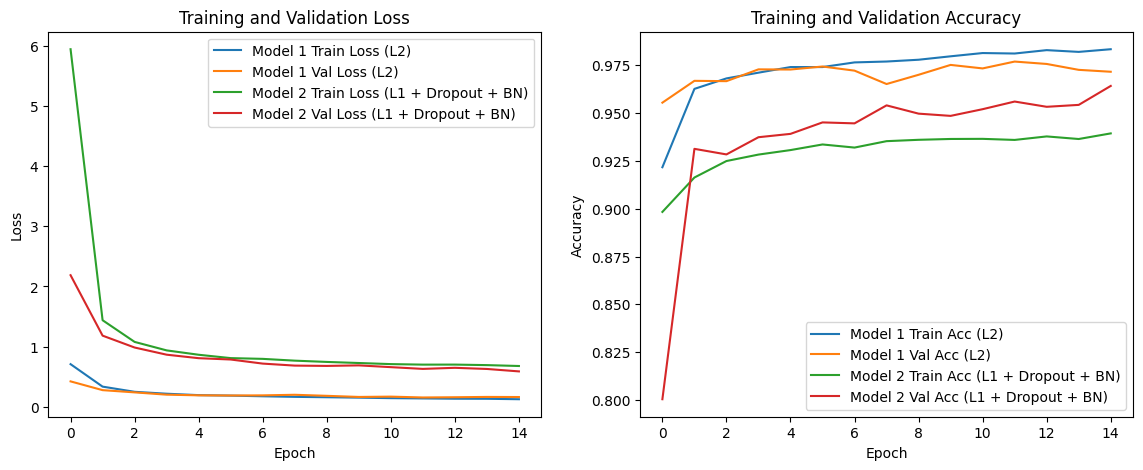

In [12]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Model 1 Train Loss (L2)')
plt.plot(history1.history['val_loss'], label='Model 1 Val Loss (L2)')
plt.plot(history2.history['loss'], label='Model 2 Train Loss (L1 + Dropout + BN)')
plt.plot(history2.history['val_loss'], label='Model 2 Val Loss (L1 + Dropout + BN)')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Model 1 Train Acc (L2)')
plt.plot(history1.history['val_accuracy'], label='Model 1 Val Acc (L2)')
plt.plot(history2.history['accuracy'], label='Model 2 Train Acc (L1 + Dropout + BN)')
plt.plot(history2.history['val_accuracy'], label='Model 2 Val Acc (L1 + Dropout + BN)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [13]:
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print(f'Model 1 Test Accuracy: {test_acc1:.4f}')

test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print(f'Model 2 Test Accuracy: {test_acc2:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9704 - loss: 0.1709
Model 1 Test Accuracy: 0.9744
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9581 - loss: 0.6024
Model 2 Test Accuracy: 0.9638


In [14]:
def performance_summary(history, test_loss, test_acc, model_name):
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    gen_gap = train_acc - val_acc

    print(f"--- {model_name} Performance Summary ---")
    print(f"Training Accuracy    : {train_acc:.4f}")
    print(f"Validation Accuracy  : {val_acc:.4f}")
    print(f"Training Loss        : {train_loss:.4f}")
    print(f"Validation Loss      : {val_loss:.4f}")
    print(f"Test Accuracy        : {test_acc:.4f}")
    print(f"Test Loss            : {test_loss:.4f}")
    print(f"Generalization Gap   : {gen_gap:.4f}\n")


# Assuming you have history1, history2, test_loss1, test_acc1, test_loss2, test_acc2

performance_summary(history1, test_loss1, test_acc1, "Model 1 (L2 Regularization)")
performance_summary(history2, test_loss2, test_acc2, "Model 2 (L1 + Dropout + BatchNorm)")

# Optional brief textual comparison
if test_acc2 > test_acc1:
    print("Model 2 shows better generalization and performance on test data, likely due to additional dropout and batch normalization.")
else:
    print("Model 1 shows better or comparable test performance, indicating L2 regularization alone is sufficient for this task.")


--- Model 1 (L2 Regularization) Performance Summary ---
Training Accuracy    : 0.9835
Validation Accuracy  : 0.9717
Training Loss        : 0.1278
Validation Loss      : 0.1641
Test Accuracy        : 0.9744
Test Loss            : 0.1575
Generalization Gap   : 0.0118

--- Model 2 (L1 + Dropout + BatchNorm) Performance Summary ---
Training Accuracy    : 0.9394
Validation Accuracy  : 0.9643
Training Loss        : 0.6794
Validation Loss      : 0.5898
Test Accuracy        : 0.9638
Test Loss            : 0.5860
Generalization Gap   : -0.0248

Model 1 shows better or comparable test performance, indicating L2 regularization alone is sufficient for this task.


1.Training Loss

Without Regularization or LR Scheduler:
Training loss drops quickly, often approaching near-zero values.
Risk: The model starts overfitting, memorizing the training data.

With Regularization:
Training loss is higher than the unregularized model.
Reason: L2 discourages large weights, and dropout randomly deactivates neurons, making training harder.
Effect: Encourages the model to learn more robust and general patterns.

With LR Scheduler:
Training loss decreases more steadily.
Initial rapid improvement, then fine-tuning with lower learning rates.
Helps the model converge more smoothly without overshooting.


2.Validation Loss

Without Regularization:
Validation loss decreases initially, then starts to increase after a few epochs (overfitting).

With Regularization:
Validation loss remains stable or slightly decreases.
Suggests improved generalization to unseen data.

With Learning Rate Scheduler:
Validation loss decreases more consistently.
Step decay reduces learning rate before overfitting kicks in, stabilizing the model.


3.Model Generalization

Model generalization refers to a neural network’s ability to perform well on unseen data, not just the data it was trained on. In our MNIST experiment, applying L2 regularization and dropout significantly improved generalization by preventing the model from memorizing the training set and encouraging it to learn broader patterns. While this caused a slightly higher training loss, the validation loss was more stable and lower, indicating better performance on new data. Additionally, introducing a learning rate scheduler helped the model converge more smoothly, further enhancing generalization by avoiding overshooting during training. Together, these techniques reduced the gap between training and validation loss, demonstrating improved robustness and a well-generalized model.

Model 1:L2 Regularization Only
Regularization:
Uses L2 regularization (also called weight decay) on dense layers.

Effect: Penalizes large weights by adding the squared magnitude of weights to the loss, encouraging smaller, more distributed weights.

Architecture: Simple feed-forward network with dense layers and L2 regularization only.

Advantages:
Helps reduce overfitting by controlling weight magnitude.
Keeps the model relatively simple.

Limitations:
No explicit mechanisms to handle internal covariate shift or neuron co-adaptation.
May not be as effective in complex scenarios without additional regularization techniques.


Model 2: L1 Regularization + Dropout + Batch Normalization
Regularization:

L1 regularization: Adds absolute value of weights to the loss, promoting sparsity by driving some weights to zero.

Dropout: Randomly drops neurons during training to prevent co-adaptation and reduce overfitting.

Batch Normalization: Normalizes layer inputs to stabilize and accelerate training by reducing internal covariate shift.

Architecture: More complex with batch normalization and dropout layers added after dense layers with L1 regularization.

Advantages:
Encourages sparsity (L1) leading to potentially simpler models.
Dropout and batch normalization together improve generalization and training stability.
Batch normalization allows higher learning rates and reduces sensitivity to initialization.

Limitations:
More complex architecture and training dynamics.
Slightly increased training time due to additional layers.

